<a href="https://colab.research.google.com/github/1900690/grape-sky-segmentation/blob/main/grape-sky-binarization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#〇画像から開空率測定

※初めて使用する方は[Colab の紹介動画](https://www.youtube.com/watch?v=inN8seMm7UI)や[Colabチュートリアル](https://colab.research.google.com/)を行ってこのノートブックの使い方を学んでください

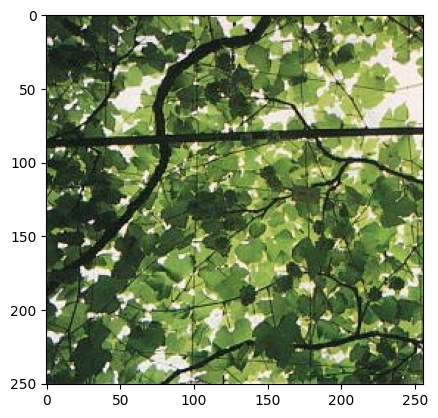

In [ ]:
#@title 分析する画像をアップロード（またはサンプル画像で分析）
#@markdown ※分析可能な画像の拡張子は".jpg"".png"".heic"のみです。
!pip install image pillow_heif pillow >/dev/null
from google.colab import files
import os
import glob
import pathlib
import pillow_heif
from PIL import Image

サンプル画像を使用する = True # @param {type:"boolean"}
#heic->jpg処理
def heic_jpg(image_path, save_path):
    heif_file = pillow_heif.read_heif(image_path)[0]  # 常に1つファイルだけが返ってくるので、[0]をつける
    image = Image.frombytes(
        heif_file.mode,
        heif_file.size,
        heif_file.data,
        'raw',
        heif_file.mode,
        heif_file.stride,
    )
    image.save(save_path, "JPEG")

if サンプル画像を使用する == True:
  if os.path.exists('/content/sample.jpg'):
     os.remove('/content/sample.jpg')
  !wget -q https://github.com/1900690/grape-sky-segmentation/releases/download/sample/sample.jpg
  #読み込んだ画像を表示
  #・OpenCVを使って画像を読み込む cv2.imreadでOpenCV形式に変換 OpenCVはBGRなのでcvtColorでRGBに直してから表示する
  import cv2
  from matplotlib import pyplot as plt
  uploaded_file_name="sample.jpg"
  orig = cv2.imread("/content/"+uploaded_file_name)
  src = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)
  plt.imshow(src)
else:
  uploaded_file = files.upload()
  uploaded_file_name = next(iter(uploaded_file))


  #・OpenCVを使って画像を読み込む cv2.imreadでOpenCV形式に変換 OpenCVはBGRなのでcvtColorでRGBに直してから表示する
  import cv2
  from matplotlib import pyplot as plt

  hiec_dir = "/content/"
  save_dir = "/content/"

  hiec_dir = pathlib.Path(hiec_dir)
  save_dir = pathlib.Path(save_dir)

  heic_path = list(hiec_dir.glob('**/*.heic'))

  for i in heic_path:
    image_path = str(i)
    save_path =  str(save_dir / i.stem) + '.jpg'
    heic_jpg(image_path, save_path)
  if uploaded_file_name[-5:] == ".heic":
     uploaded_file_name = uploaded_file_name[:-5] + ".jpg"

  #読み込んだ画像を表示
  orig = cv2.imread(uploaded_file_name)
  src = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)
  plt.imshow(src)

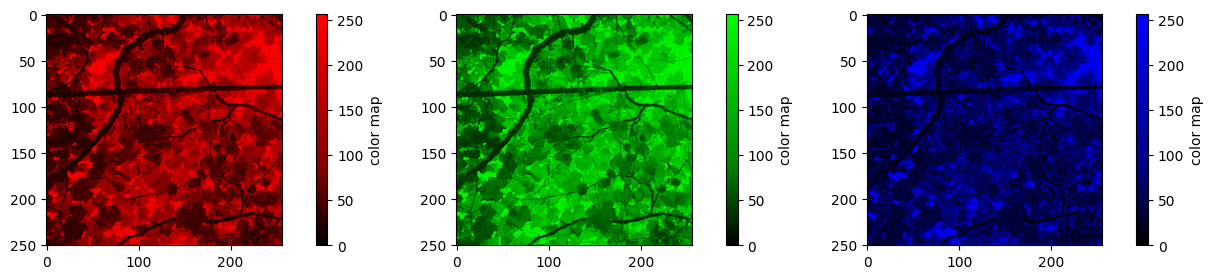

In [ ]:
#@title RGBに分けた画像を表示
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

#カラーマップ作製
#赤
r1 = np.array([0,0,0]) / 256
r2 = np.array([128,0,0]) / 256
r3 = np.array([192,0,0]) / 256
r4 = np.array([256,0,0]) / 256
cmr = LinearSegmentedColormap.from_list(name='customred', colors=[r1, r2, r3, r4])
#緑
g1 = np.array([0,0,0]) / 256
g2 = np.array([0,128,0]) / 256
g3 = np.array([0,192,0]) / 256
g4 = np.array([0,256, 0]) / 256
cmg = LinearSegmentedColormap.from_list(name='customgreen', colors=[g1, g2, g3, g4])
#青
b1 = np.array([0,0,0]) / 256
b2 = np.array([0,0,128]) / 256
b3 = np.array([0,0,192]) / 256
b4 = np.array([0,0,256]) / 256
cmb = LinearSegmentedColormap.from_list(name='customblue', colors=[b1, b2, b3, b4])

#色の指定の最小値、最大値
vmin,vmax = 0, 256

r = np.array(src[:, :, 0], dtype=np.int16)
g = np.array(src[:, :, 1], dtype=np.int16)
b = np.array(src[:, :, 2], dtype=np.int16)

#図を表示
plt.figure(figsize=(15,3))
plt.subplot(1,3,1)
plt.imshow(r,cmap = cmr, vmin=vmin, vmax=vmax)
plt.colorbar( label = 'color map', pad = 0.1)
plt.subplot(1,3,2)
plt.imshow(g,cmap = cmg, vmin=vmin, vmax=vmax)
plt.colorbar( label = 'color map', pad = 0.1)
plt.subplot(1,3,3)
plt.imshow(b,cmap = cmb, vmin=vmin, vmax=vmax)
plt.colorbar( label = 'color map', pad = 0.1)

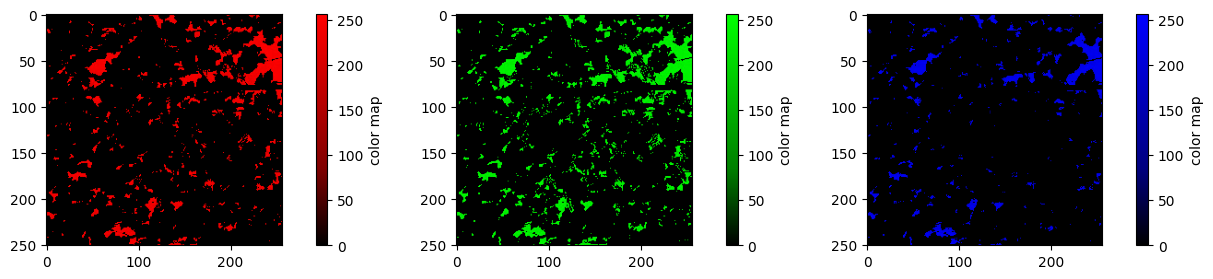

In [ ]:
#@title 各色の二値化の基準を決め各色のマスクを作成
#@markdown 赤の閾値
Rmax = 255 # @param {type:"slider", min:0, max:255, step:1}
Rmin = 200 # @param {type:"slider", min:0, max:255, step:1}
#@markdown 緑の閾値
Gmax = 255 # @param {type:"slider", min:0, max:255, step:1}
Gmin = 200 # @param {type:"slider", min:0, max:255, step:1}
#@markdown 青の閾値
Bmax = 255 # @param {type:"slider", min:0, max:255, step:1}
Bmin = 200 # @param {type:"slider", min:0, max:255, step:1}


r_temp=np.where(r < Rmin, 0, r)
r_mask=np.where(r_temp > Rmax, 0, r_temp)

g_temp=np.where(g < Gmin, 0, g)
g_mask=np.where(g_temp > Gmax, 0, g_temp)

b_temp=np.where(b < Bmin, 0, b)
b_mask=np.where(b_temp > Bmax, 0, b_temp)

#図を表示
plt.figure(figsize=(15,3))
plt.subplot(1,3,1)
plt.imshow(r_mask,cmap = cmr, vmin=vmin, vmax=vmax)
plt.colorbar( label = 'color map', pad = 0.1)
plt.subplot(1,3,2)
plt.imshow(g_mask,cmap = cmg, vmin=vmin, vmax=vmax)
plt.colorbar( label = 'color map', pad = 0.1)
plt.subplot(1,3,3)
plt.imshow(b_mask,cmap = cmb, vmin=vmin, vmax=vmax)
plt.colorbar( label = 'color map', pad = 0.1)

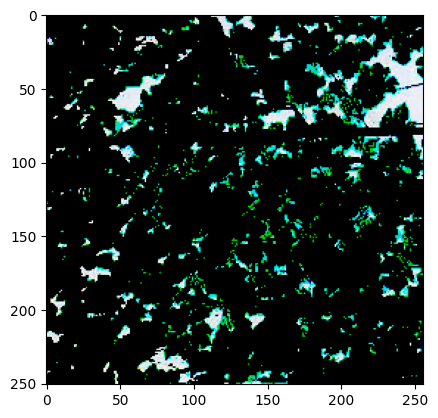

In [ ]:
#@title 分けた画像を合成
binde_image=np.empty_like(src)
binde_image[:,:,0]=r_mask
binde_image[:,:,1]=g_mask
binde_image[:,:,2]=b_mask

src2 = cv2.cvtColor(binde_image, cv2.COLOR_BGR2RGB)
plt.imshow(src2)

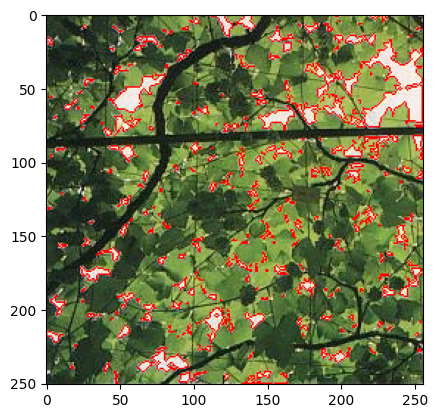

In [ ]:
#@title 元の画像に輪郭線を描写
import numpy as np
import cv2
import matplotlib.pyplot as plt
from copy import deepcopy
import statistics

#@markdown 囲む面積の大きさでノイズを除去する(範囲は0:除去無し～１;全除去)
minimum_area_ratio = 0 # @param {type:"number"}

binde_image_binary=binde_image[:,:,0]+binde_image[:,:,1]+binde_image[:,:,2]

contours, hierarchy = cv2.findContours(binde_image_binary.astype("uint8"), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
img_with_line = deepcopy(orig)
for i in range(len(contours)):
    if cv2.contourArea(contours[i]) > (src.shape[0] * src.shape[1]) * minimum_area_ratio:
        img_with_line = cv2.drawContours(img_with_line, contours, i, (0,0,255), 1)

plt.imshow(cv2.cvtColor(img_with_line, cv2.COLOR_BGR2RGB))
#cv2.imwrite('allresult_line.png', img_with_line)

白の占める割合は 11 %


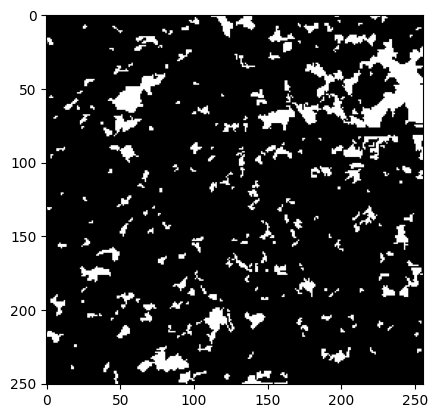

In [ ]:
#@title 画面の中の白の割合を計算
import math

img_with_area = deepcopy(np.ones((src.shape[0], src.shape[1], 3), np.uint8)*0)
for i in range(len(contours)):
    if cv2.contourArea(contours[i]) > (src.shape[0] * src.shape[1]) * minimum_area_ratio:
        img_with_area = cv2.fillPoly(img_with_area, [contours[i][:,0,:]], (255,255,255), lineType=cv2.LINE_8, shift=0)
plt.imshow(cv2.cvtColor(img_with_area, cv2.COLOR_BGR2RGB))

img_with_area_binary=img_with_area[:, :, 0]+img_with_area[:, :, 1]+img_with_area[:, :, 2]
img_with_area_binary=np.where(img_with_area_binary > 0, 1, 0)

plt.imshow(img_with_area_binary, cmap='gray')

all_pixcel=img_with_area_binary.shape[0]*img_with_area_binary.shape[1]
sky_pixcel=np.sum(img_with_area_binary)

sky_occupancy_rate=sky_pixcel/all_pixcel
print("白の占める割合は",math.floor(sky_occupancy_rate*100),"%")

In [ ]:
#@title マスク画像をダウンロード
from PIL import Image

#@markdown マスク画像の色をRGBで指定する
Routput = 197 # @param {type:"slider", min:0, max:255, step:1}
Goutput = 255 # @param {type:"slider", min:0, max:255, step:1}
Boutput = 255 # @param {type:"slider", min:0, max:255, step:1}


img_with_area_output=np.empty_like(src)
img_with_area_output[:,:,0]=np.where(img_with_area[:, :, 0] > 0, Routput, 0)
img_with_area_output[:,:,1]=np.where(img_with_area[:, :, 1] > 0, Goutput, 0)
img_with_area_output[:,:,2]=np.where(img_with_area[:, :, 2] > 0, Boutput, 0)

pil_img = Image.fromarray(img_with_area_output)
pil_img.save('/content/binary_'+uploaded_file_name[0:-4]+".png")

files.download('/content/binary_'+uploaded_file_name[0:-4]+".png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#〇展望

*   各色の閾値を個別に設定するため、2つ重なった葉の色、３つ重なった葉の色と指定すれば階層構造の葉の面積も分析可能。
*   平均的な空の色の色分布を分析すれば自動的な空分析が可能になる。



#〇参考

[デジタルカメラと画像処理ソフト「Fiji-ImageJ」を用いたブドウの葉面積指数の簡易推定技術](https://www.naro.go.jp/laboratory/karc/prefectural_results/files/R02_4_04.pdf)

#〇要望や質問はこちらから

[アンケートフォーム](https://forms.gle/siBq2jjmxHTffyJZ6)

※返信を希望される方は、以下のメールアドレスまでお問合せ願います。

アドレス:iwase-r9008@pref.fukuoka.lg.jp

Copyright (c) 2025 risa iwase

Released under the MIT license

https://opensource.org/licenses/mit-license.php